In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
lettings = pd.read_csv('clean_lettings_with_price')
lettings.head()

,title,reviews,rating,number_of_reviews,accomodation_type,guests,beds,bathrooms,price,amenities
0,The Studio in West Ealing London,['Jessica April 2020 A very compact space clos...,4.69,275.0,Entire guest suite,2,1,1.0,45,28
1,LAST MINUTE - SINGLE ROOM,['Richard March 2020 All you need for a stay. ...,4.87,164.0,Private room in house,1,1,2.0,29,25
2,Homely room in leafy Ealing.,['Brian March 2020 Second time staying with Ti...,4.75,333.0,Private room in house,1,1,1.0,29,17
3,"Small single room, West London, budget travel!","[""Czarek February 2020 Another great stay at R...",4.68,28.0,Private room in house,1,1,1.0,21,26
4,Cosy Double Room,['Dory March 2020 Perfect Dory February 2020 E...,4.78,39.0,Private room in house,1,1,1.5,21,17


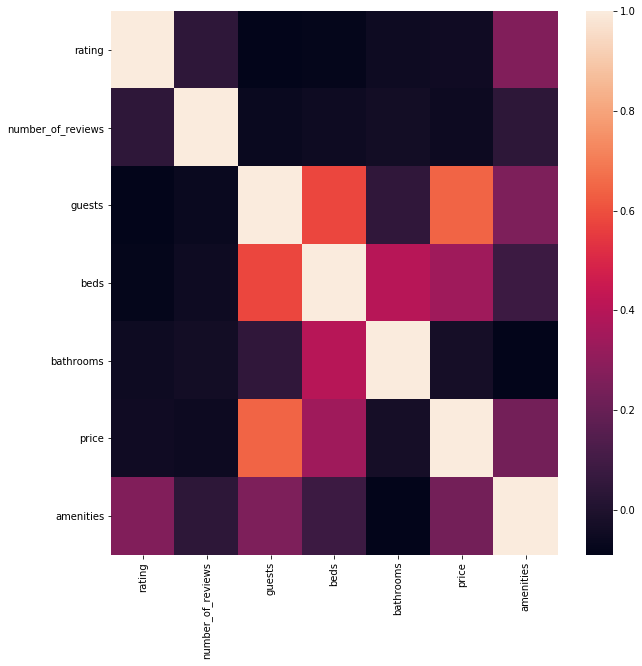

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(lettings.corr())

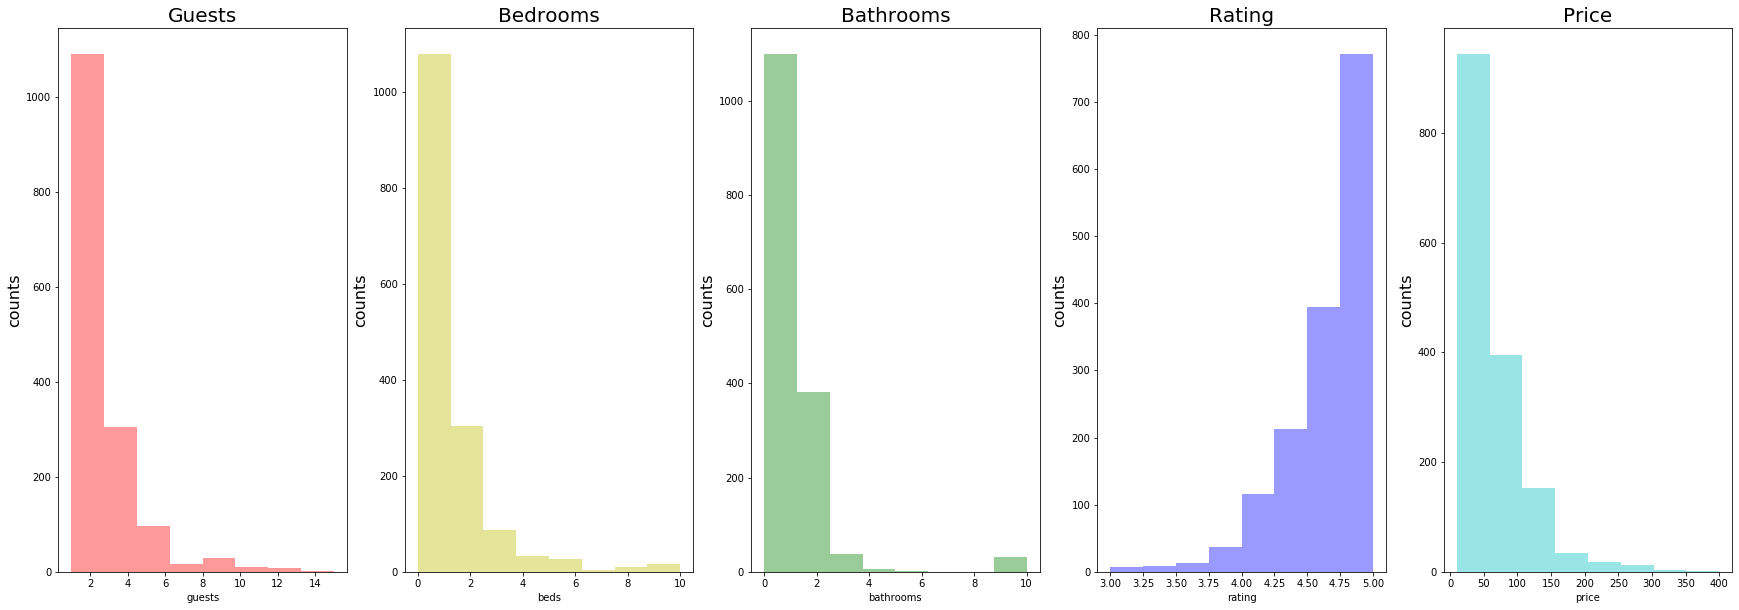

In [7]:
fig, ax = plt.subplots(ncols=5, figsize=(30, 10))
sns.distplot(lettings.guests, bins=8, kde=False, ax=ax[0], color='r')
ax[0].set_ylabel('counts', fontsize=16)
ax[0].set_title('Guests', fontsize=20)

sns.distplot(lettings.beds, bins=8, kde=False, ax=ax[1], color='y')
ax[1].set_ylabel('counts', fontsize=16)
ax[1].set_title('Bedrooms', fontsize=20)

sns.distplot(lettings.bathrooms, bins=8, kde=False, ax=ax[2], color='g')
ax[2].set_ylabel('counts', fontsize=16)
ax[2].set_title('Bathrooms', fontsize=20)

sns.distplot(lettings.rating, bins=8, kde=False, ax=ax[3], color='b')
ax[3].set_ylabel('counts', fontsize=16)
ax[3].set_title('Rating', fontsize=20)

sns.distplot(lettings.price, bins=8, kde=False, ax=ax[4], color='c')
ax[4].set_ylabel('counts', fontsize=16)
ax[4].set_title('Price', fontsize=20);

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/an

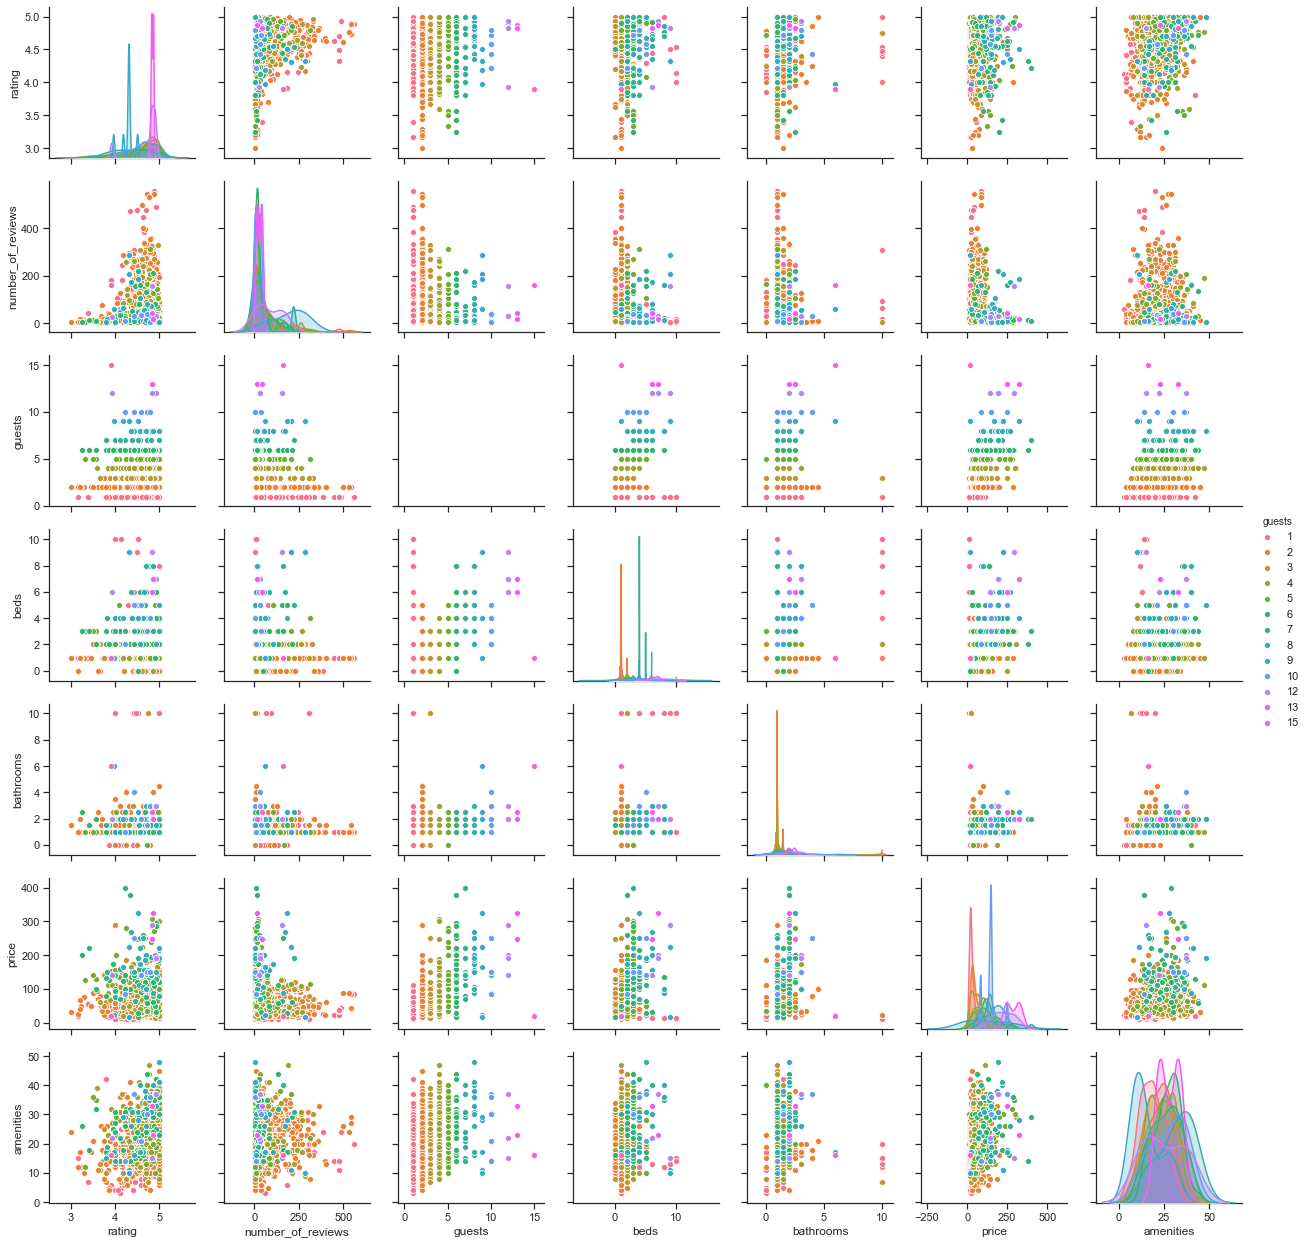

In [15]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(lettings, hue='guests');

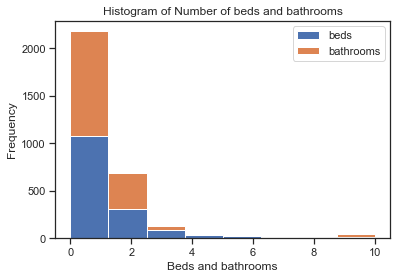

In [16]:
lettings[['beds','bathrooms']].plot(kind='hist', bins=8, stacked=True, title='Histogram of Number of beds and bathrooms')
plt.xlabel('Beds and bathrooms')
plt.show()

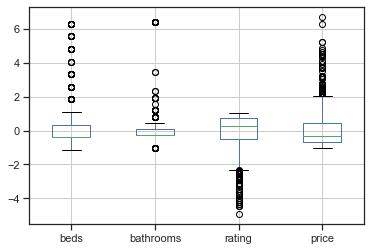

In [17]:
def var_standardized(var):
    var_stand = (var-var.mean())/var.std()
    return var_stand

lettings_eda = pd.DataFrame()
lettings_eda['beds'] = var_standardized(lettings.beds)
lettings_eda['bathrooms'] = var_standardized(lettings.bathrooms)
lettings_eda['rating'] = var_standardized(lettings.rating)
lettings_eda['price'] = var_standardized(lettings.price)

lettings_eda.boxplot()
plt.show()

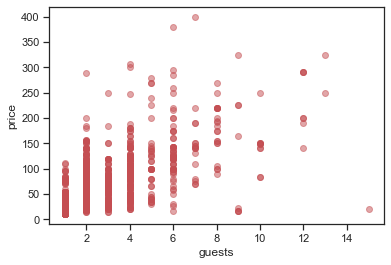

In [23]:
plt.scatter(x=lettings.guests, y=lettings.price, c='r', alpha=0.5)
plt.xlabel("guests")
plt.ylabel("price")
plt.show()

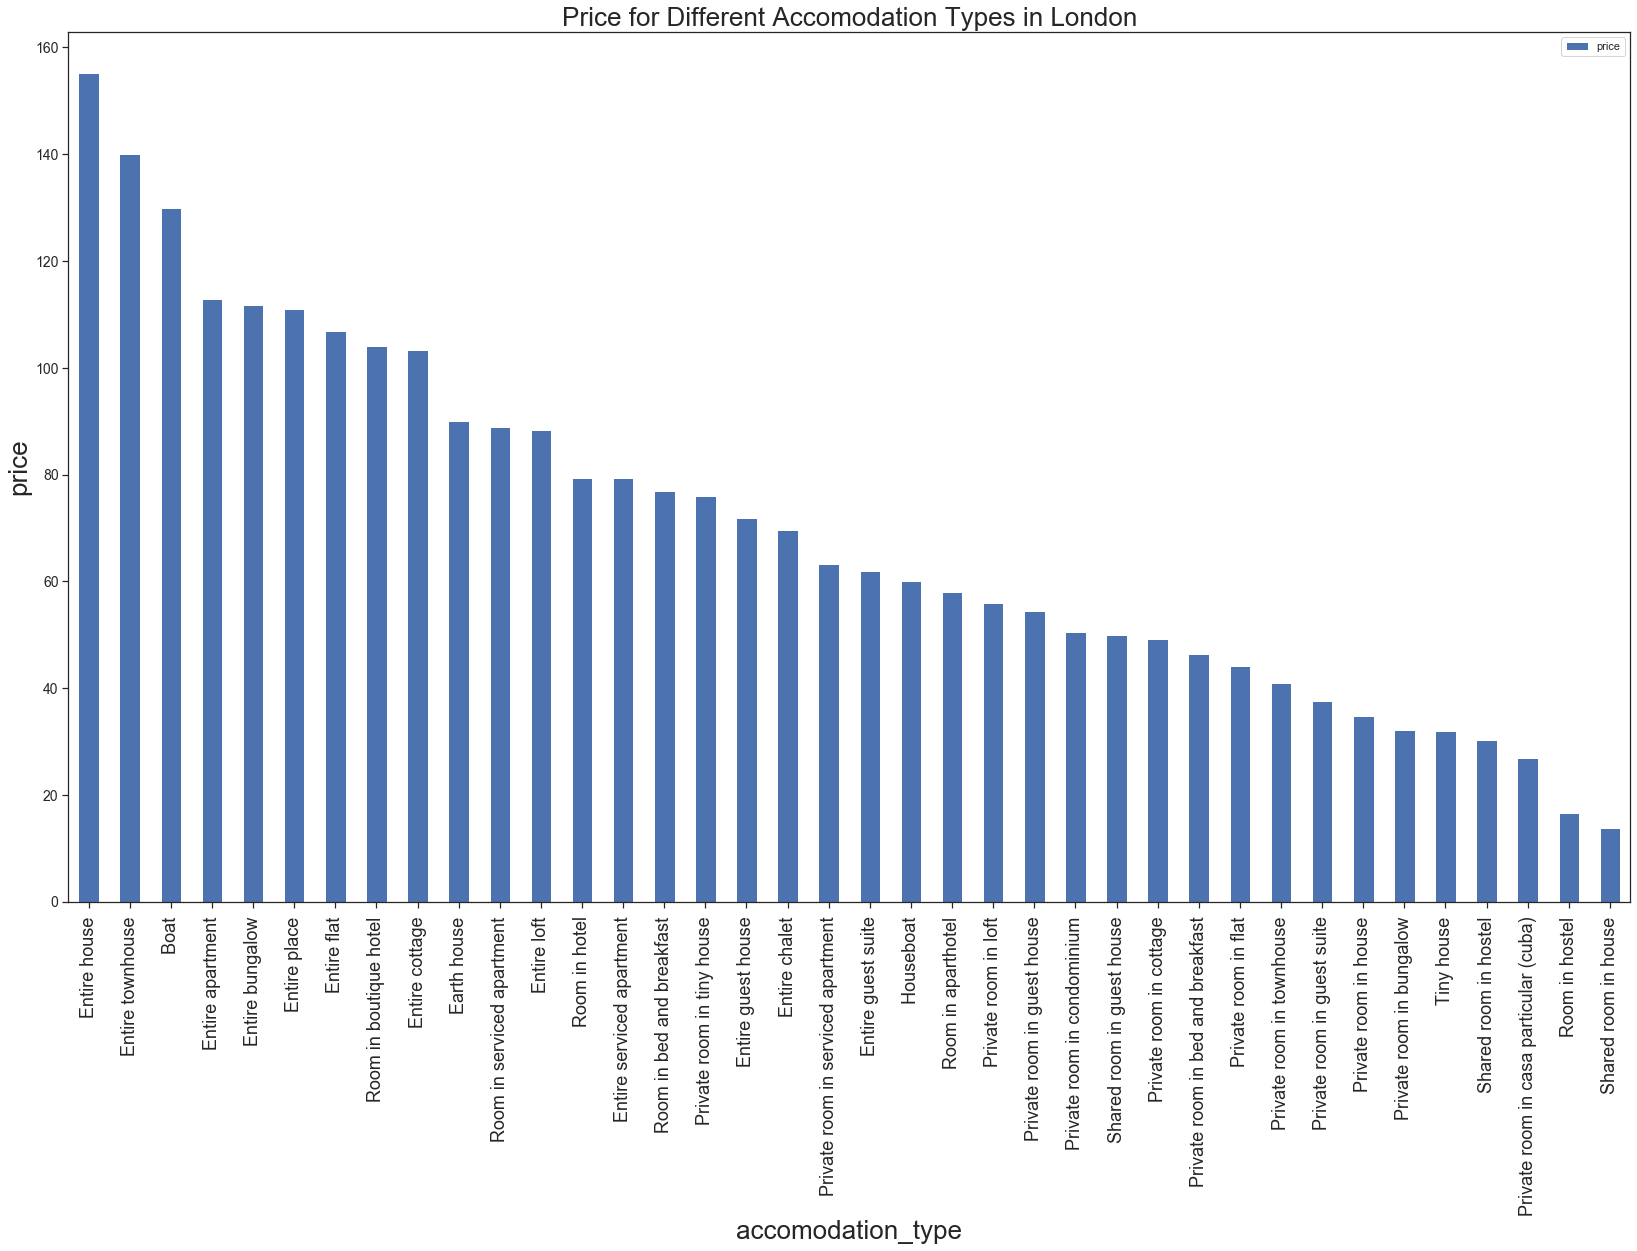

In [43]:
lettings.groupby('accomodation_type')[['price']].mean().sort_values('price', ascending=False).plot(kind='bar', figsize=(28,16))
plt.xlabel('accomodation_type', fontsize=26)
plt.ylabel('price', fontsize=26)
plt.title('Price for Different Accomodation Types in London', fontsize=26)
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=14, rotation=0);

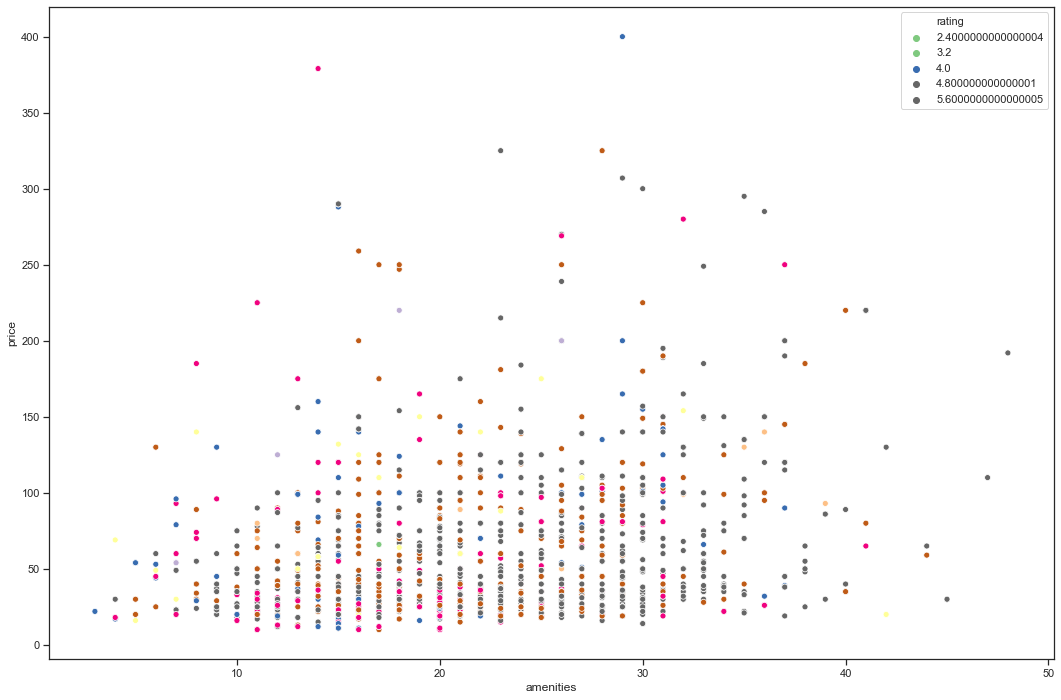

In [88]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.scatterplot(x="amenities", y="price",hue="rating",data=lettings, palette='Accent');


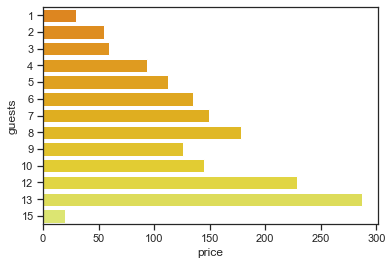

In [96]:
temp = lettings.groupby('guests')[['price']].mean()
sns.barplot(y = 'guests', x = 'price', data = temp.reset_index().sort_values(['price'],
            ascending=False), orient='h', palette = 'Wistia_r')


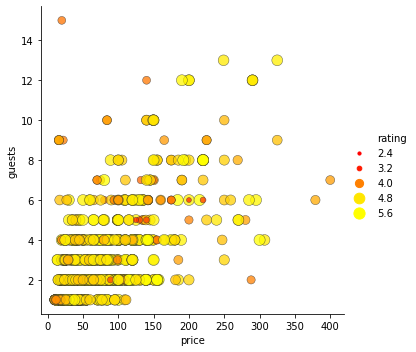

In [31]:
sns.relplot(x="price", y="guests",
            hue="rating", size="rating",
            palette="autumn", markers=["D", "o"], sizes=(10, 125),
            edgecolor=".2", linewidth=.5, alpha=.75,
            data=lettings);

In [12]:
lettings.head()

,Title,info,Rating,review1,rating,number_of_reviews,guests,beds,bathrooms,review_1,review_2,review_3,review_4,review_5,review_6,vader_compound,vader_neg,vader_neu,vader_pos
0,Brand New Studio in Victoria 7A,3 guestsStudio1 bed2 bathrooms,4.60\n222 reviews\n222 \nreviews,['Great apartment in good location and easy ch...,4.60,222.0,3,1,2,Great apartment in good location and easy chec...,I visited Alessandro's place May 2019 with my ...,Lovely clean and we'll appointed bedsit. Frien...,Alessandro and his team were extremely profess...,"Lovely apartment, the shared bathroom gave us ...",Me and my partner had a lovely time here! The ...,0.9991,0.000,0.663,0.337
1,New Huge En-Suite room Victoria Westminster,Private room in house3 guests1 bedroom3 beds1 ...,4.40\n70 reviews\n70 \nreviews,"['Thanks very helpful again', 'Thanks for all ...",4.40,70.0,3,3,1,Thanks very helpful again,Thanks for all the help,Thanks for help,The room is very spacious. The bedding is a bi...,The location is great as it is not even 10 min...,Thank you for your valuable feedback. Regardin...,0.9940,0.034,0.720,0.246
2,Executive Apt Near Westminster With Parking & Gym,4 guests1 bedroom2 beds1 bathroom,5.0\n6 reviews\n6 \nreviews,"['Just Superb', 'Great place and host', 'Would...",5.00,6.0,4,2,1,Just Superb,Great place and host,"Would definitely recommend this apartment, mod...",Great location and apartment! Would recommend,"Wonderful stay. Many thanks, Prayas.",Very nice and clean flat ! We really enjoyed t...,0.9835,0.000,0.750,0.250
3,-30%! Modern very central Big Ben Westminster,4 guests1 bedroom1 bed1 bathroom,4.80\n50 reviews\n50 \nreviews,['Diana’s apartment has everything you need an...,4.80,50.0,4,1,1,Diana’s apartment has everything you need and ...,"Wonderful host, excellent communication and gr...",Lovely place in a great location - would recom...,Fantastic apartment in a great location. I wou...,Diana's place was very conveniently located fo...,Great location for all things central. Quiet n...,0.9984,0.014,0.590,0.396
4,Luxury 2 Bedroom Flat in Westminster,6 guests2 bedrooms3 beds2 bathrooms,4.52\n65 reviews\n65 \nreviews,"['This is apartment is hosted by Will, who is ...",4.52,65.0,6,3,2,"This is apartment is hosted by Will, who is ru...",Brilliant,We really enjoyed our stay at Will’s place ! G...,"Lovely apartment in a great location, very clo...",Excellent accommodation. Top quality luxury. G...,Very clean stylish apartment in a good locatio...,0.9974,0.011,0.674,0.314


Creating a Word Cloud:

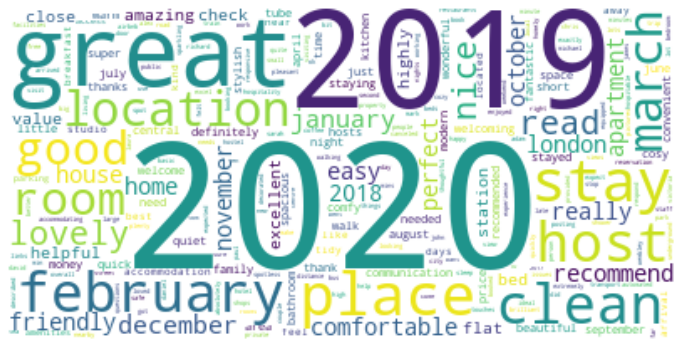

In [26]:
from operator import itemgetter
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

lettings = pd.read_csv('clean_lettings_with_price')

lettings.dropna(inplace=True)

analyzer = SentimentIntensityAnalyzer()

vader_scores = lettings['reviews'].map(analyzer.polarity_scores)

from sklearn.feature_extraction import DictVectorizer

dvec = DictVectorizer()

vader_scores = dvec.fit_transform(vader_scores)
vader_scores

for i, col in enumerate(dvec.feature_names_):
    lettings['vader_{}'.format(col)] = vader_scores[:, i].toarray().ravel()

worst_reviews = lettings.sort_values('vader_neg', ascending=False)[:20]

X = lettings.reviews

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(stop_words = 'english', strip_accents = 'ascii', max_features = 5000)
X_reviews = tvec.fit(X)

X_reviews = tvec.transform(X)

words_t = tvec.get_feature_names()

def word_frequency_sorter(words, counts):
    '''Sort the words by frequency.'''
    sort_result = sorted(zip(words, list(counts)),
                         key=itemgetter(1), reverse=True)
    return sort_result

def word_counter(mat):
    '''Count word appearances.'''
    count = np.array(mat.sum(axis=0))[0]
    return count

tsum_all = word_counter(X_reviews)

df_t_word_frequency = pd.DataFrame(word_frequency_sorter(words_t, tsum_all), columns=['word', 'frequency'])
df_t_word_frequency.set_index('word', inplace=True)

d_all_t = {}
for a, x in pd.DataFrame(word_frequency_sorter(words_t, tsum_all), columns=['word', 'frequency']).values:
    d_all_t[a] = x

wordcloud_all_t = WordCloud(background_color="white", max_words=400).generate_from_frequencies(d_all_t)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud_all_t, interpolation="bilinear")
plt.axis("off")
plt.show()